In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjusts the configuration of the plots we will create

# Read in data
df = pd.read_csv('/Users/anthonylaite/Desktop/projects/WorldExpenditures.csv')

# Drop the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 

# Display the entire DataFrame
df

,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,2000,Australia,Total function,153122.633,37.36193
1,2000,Australia,"Agriculture, forestry, fishing and hunting",2195.583,0.53572
2,2000,Australia,"Mining, manufacturing and construction",905.018,0.22082
3,2000,Australia,Transport,11417.379,2.78584
4,2000,Australia,Fuel and energy,2251.241,0.54930
...,...,...,...,...,...
25728,2021,United States of America,Social protection,2827585.060,12.07255
25729,2021,United States of America,General public services,1291640.230,5.51474
25730,2021,United States of America,Defence,759321.990,3.24197
25731,2021,United States of America,Public order and safety,459973.190,1.96388


In [19]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col, pct_missing))



Year - 0.0
Country - 0.0
Sector - 0.0
Expenditure(million USD) - 0.021761939921501574
GDP(%) - 0.021761939921501574


In [26]:
df.dtypes

Year                          int64
Country                      object
Sector                       object
Expenditure(million USD)    float64
GDP(%)                      float64
dtype: object

In [32]:

df['Country'].drop_duplicates().sort_values(ascending=False)


2697                                Yemen
12565                             Vanuatu
15127                          Uzbekistan
775              United States of America
756                        United Kingdom
1641                              Ukraine
9000                              Türkiye
13774                              Tuvalu
736                           Timor-Leste
735                              Thailand
716            Switzerland, Liechtenstein
706                                Sweden
696                             Sri Lanka
677                                 Spain
663                          South Africa
20408                             Somalia
644                              Slovenia
634                              Slovakia
620                             Singapore
607                            Seychelles
7751                Serbia and Montenegro
587                                Serbia
2470                           San Marino
11108                             

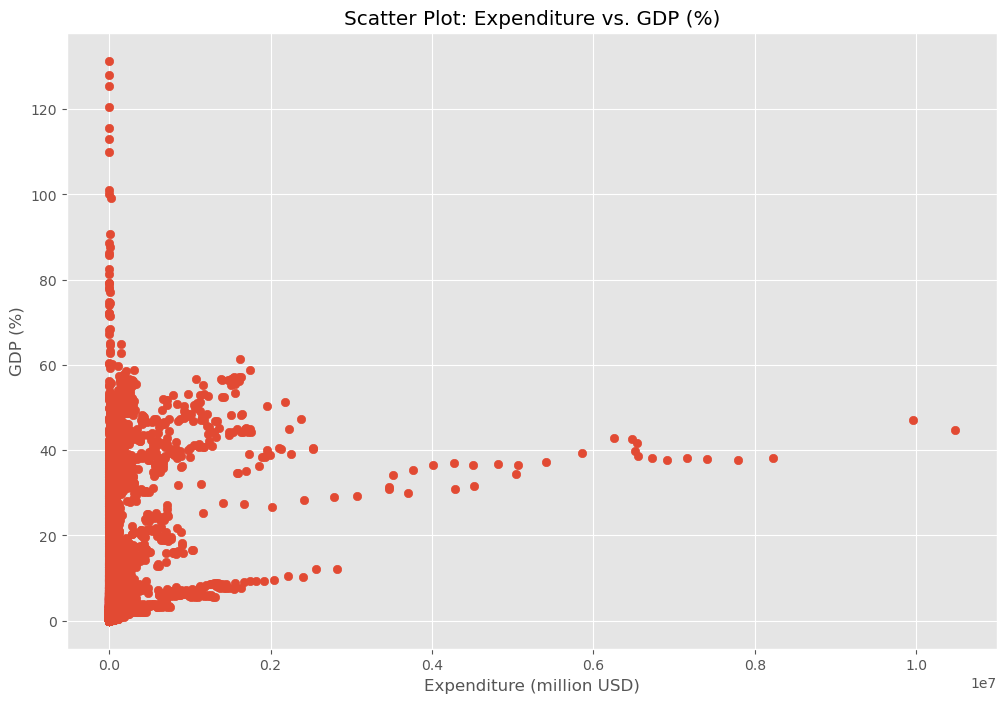

In [33]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between Expenditure and GDP (%)
plt.scatter(x=df['Expenditure(million USD)'], y=df['GDP(%)'])
plt.title('Scatter Plot: Expenditure vs. GDP (%)')
plt.xlabel('Expenditure (million USD)')
plt.ylabel('GDP (%)')
plt.show()

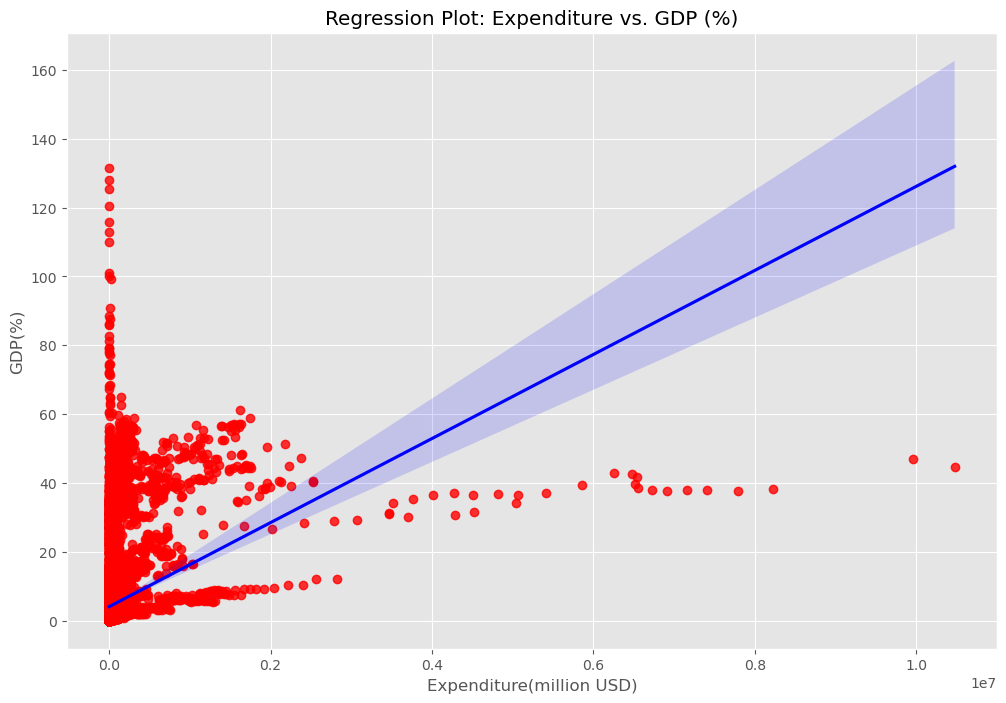

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt


sns.regplot(x='Expenditure(million USD)', y='GDP(%)', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Regression Plot: Expenditure vs. GDP (%)')
plt.show()


In [35]:
import pandas as pd

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_pearson = df[numeric_columns].corr()

print(correlation_matrix_pearson)

                              Year  Expenditure(million USD)    GDP(%)
Year                      1.000000                  0.029711 -0.000590
Expenditure(million USD)  0.029711                  1.000000  0.307794
GDP(%)                   -0.000590                  0.307794  1.000000


In [4]:
# Import libraries
import pandas as pd

# Read in data
df = pd.read_csv('/Users/anthonylaite/Desktop/projects/WorldExpenditures.csv')

# Drop the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Replace 'Country' and 'Sector' columns with numerical values
df['Country'] = pd.Categorical(df['Country'])
df['Country'] = df['Country'].cat.codes

df['Sector'] = pd.Categorical(df['Sector'])
df['Sector'] = df['Sector'].cat.codes

# Display the modified DataFrame
(df)




,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,2000,3,18,153122.633,37.36193
1,2000,3,0,2195.583,0.53572
2,2000,3,11,905.018,0.22082
3,2000,3,19,11417.379,2.78584
4,2000,3,6,2251.241,0.54930
...,...,...,...,...,...
25728,2021,92,17,2827585.060,12.07255
25729,2021,92,8,1291640.230,5.51474
25730,2021,92,2,759321.990,3.24197
25731,2021,92,14,459973.190,1.96388


                              Year  Expenditure(million USD)    GDP(%)
Year                      1.000000                  0.029711 -0.000590
Expenditure(million USD)  0.029711                  1.000000  0.307794
GDP(%)                   -0.000590                  0.307794  1.000000


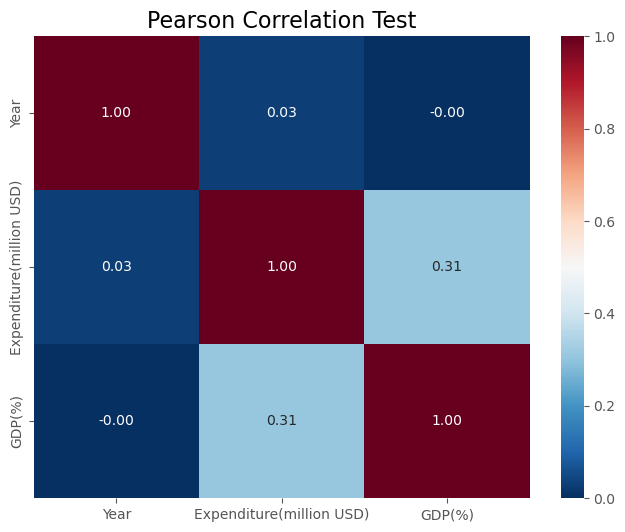

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_pearson = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix_pearson)

# Create a heatmap with a custom color map and title
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix_pearson, annot=True, cmap="RdBu_r", fmt=".2f")
plt.title("Pearson Correlation Test", fontsize=16)  # Add the title

plt.show()

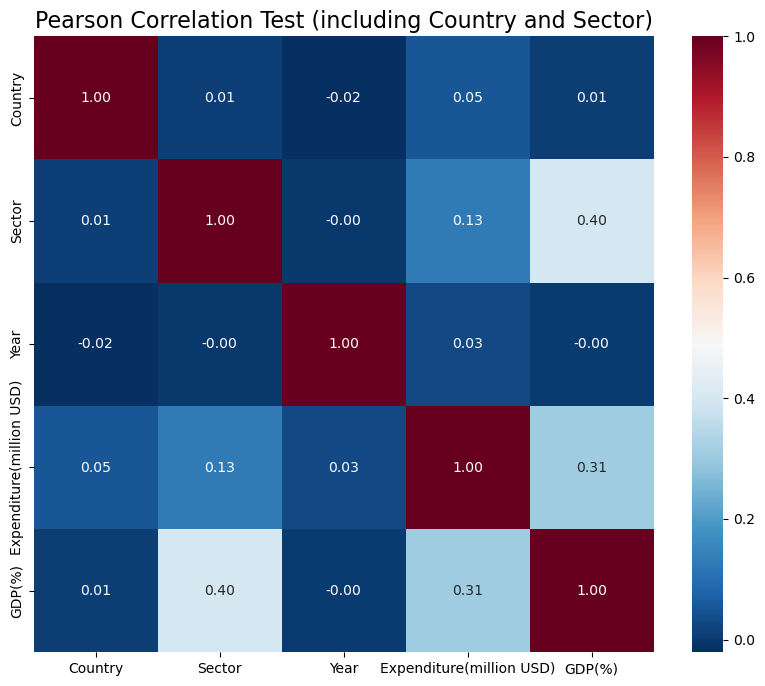

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Country', 'Sector']
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
selected_columns = categorical_columns + list(numeric_columns)

subset_df = df[selected_columns]
correlation_matrix_pearson = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap="RdBu_r", fmt=".2f", xticklabels=selected_columns, yticklabels=selected_columns)
plt.title("Pearson Correlation Test (including Country and Sector)", fontsize=16)

plt.show()



In [15]:
import pandas as pd

correlation_mat = df.corr()

(correlation_mat)


,Year,Country,Sector,Expenditure(million USD),GDP(%)
Year,1.000000,-0.021175,-0.002339,0.029711,-0.000590
Country,-0.021175,1.000000,0.009301,0.052828,0.005818
Sector,-0.002339,0.009301,1.000000,0.126487,0.401555
Expenditure(million USD),0.029711,0.052828,0.126487,1.000000,0.307794
GDP(%),-0.000590,0.005818,0.401555,0.307794,1.000000


In [16]:
import pandas as pd

correlation_mat = df.corr()

# Unstack the correlation matrix and sort the pairs
corr_pairs = correlation_mat.unstack().sort_values(ascending=False)

print(corr_pairs)


Year                      Year                        1.000000
Country                   Country                     1.000000
Expenditure(million USD)  Expenditure(million USD)    1.000000
Sector                    Sector                      1.000000
GDP(%)                    GDP(%)                      1.000000
                          Sector                      0.401555
Sector                    GDP(%)                      0.401555
GDP(%)                    Expenditure(million USD)    0.307794
Expenditure(million USD)  GDP(%)                      0.307794
                          Sector                      0.126487
Sector                    Expenditure(million USD)    0.126487
Expenditure(million USD)  Country                     0.052828
Country                   Expenditure(million USD)    0.052828
Expenditure(million USD)  Year                        0.029711
Year                      Expenditure(million USD)    0.029711
Country                   Sector                      0

In [18]:
import pandas as pd

correlation_mat = df.corr()

mask = (correlation_mat != 1)

sorted_pairs = (correlation_mat.where(mask)
                .unstack()
                .sort_values(ascending=False)
                .drop_duplicates())

filtered_pairs = sorted_pairs[(sorted_pairs > 0.29) & (sorted_pairs < 1.0)]
print(filtered_pairs)



Sector  GDP(%)                      0.401555
GDP(%)  Expenditure(million USD)    0.307794
dtype: float64
